# **Association Rules Assignment**

# **Assignment 9(a)**

# **1.Book DataSet(book.csv)**

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
books=pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# **Exploratory Data Analysis**

In [3]:
books.shape

(2000, 11)

In [4]:
#checking missing values
books.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
books.isna().any()

ChildBks     False
YouthBks     False
CookBks      False
DoItYBks     False
RefBks       False
ArtBks       False
GeogBks      False
ItalCook     False
ItalAtlas    False
ItalArt      False
Florence     False
dtype: bool

In [6]:
#checking duplicates
books.duplicated().sum()

1680

In [7]:
books.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
#no missing values and all data are in integer format...

**Data preprocessing is not required because data is already in transaction format**

# **Apriori Algorithm**

In [11]:
#Apriori algorithm

**1.Association rules of 20% support and 60% confidence**

In [12]:
frequent_items=apriori(books,min_support=0.2,use_colnames=True)     #support=0.2(20%)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [13]:
rules=association_rules(frequent_items,metric='lift',min_threshold=0.6)      #confidence=60%
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


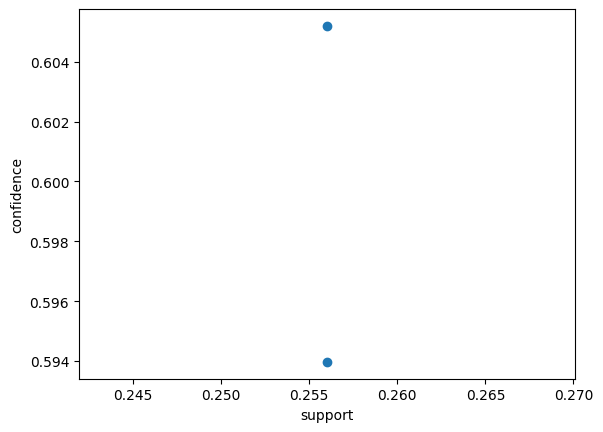

In [14]:
#visualization plot
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**2.Association rules of 30% support and 50% confidence**

In [15]:
frequent_items2=apriori(books,min_support=0.3,use_colnames=True)
frequent_items2

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [16]:
rules2=association_rules(frequent_items2,metric='lift',min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Text(0, 0.5, 'confidence')

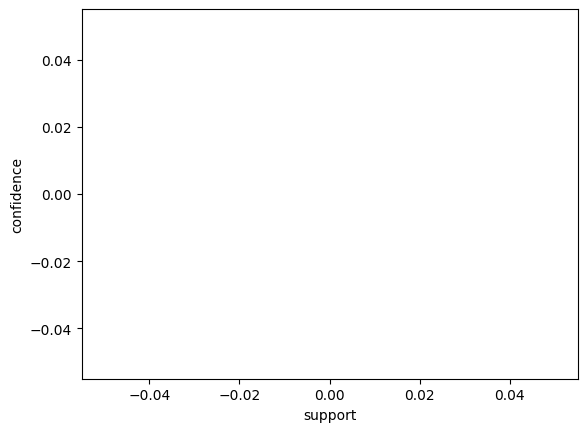

In [17]:
#visualization plot
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')

**3.Association rules of 10% support and 70% confidence**

In [18]:
frequent_items3=apriori(books,min_support=0.1,use_colnames=True)
frequent_items3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [19]:
rules3=association_rules(frequent_items3,metric='lift',min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [20]:
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [21]:
rules3[rules3.lift>1]
#lift greater than 1 means it gives good association rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


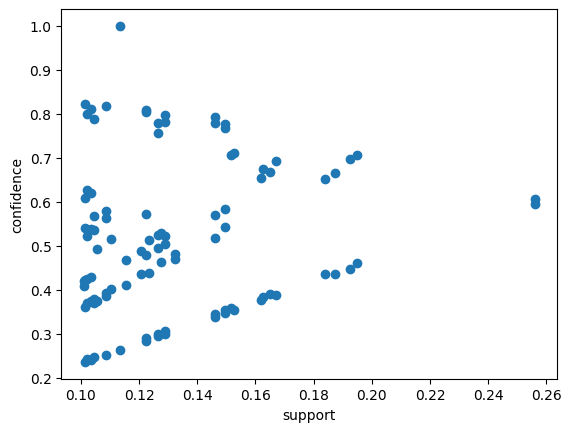

In [22]:
#visualization plot
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**4.Association rules for 5% support and 80% confidence**

In [23]:
frequent_items4=apriori(books,min_support=0.05,use_colnames=True)
frequent_items4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, ArtBks, CookBks, GeogBks)"
97,0.0650,"(DoItYBks, ArtBks, CookBks, GeogBks)"
98,0.0510,"(YouthBks, CookBks, ChildBks, DoItYBks, GeogBks)"


In [24]:
rules4=association_rules(frequent_items4,metric='lift',min_threshold=0.8)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(ChildBks, DoItYBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(CookBks),"(ChildBks, DoItYBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
659,(ChildBks),"(DoItYBks, ArtBks, CookBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(DoItYBks),"(ChildBks, ArtBks, CookBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762


In [25]:
rules4[rules4.lift>1]
#all lift values are more than 1
# lift>1 good influential rule in selecting the association transaction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(ChildBks, DoItYBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(CookBks),"(ChildBks, DoItYBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
659,(ChildBks),"(DoItYBks, ArtBks, CookBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(DoItYBks),"(ChildBks, ArtBks, CookBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762


In [26]:
rules4.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
513,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
508,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
510,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,0.924629
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


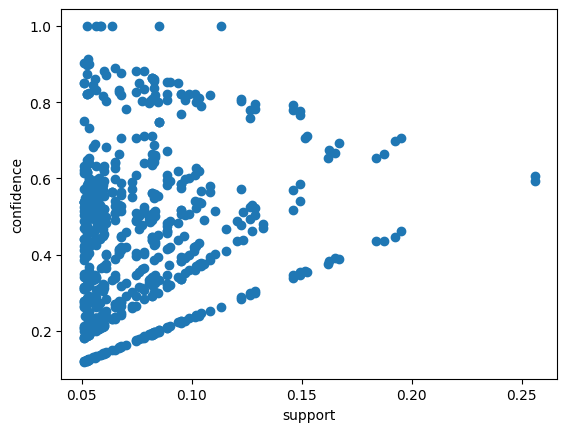

In [27]:
#visualization plot
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**5.Association rules for 3% support and 87% confidence**

In [28]:
frequent_items5=apriori(books,min_support=0.03) #apriori algorithm
frequent_items5

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
...,...,...
176,0.0535,"(0, 2, 3, 5, 6)"
177,0.0405,"(0, 2, 4, 5, 6)"
178,0.0300,"(0, 2, 5, 6, 7)"
179,0.0370,"(1, 2, 3, 5, 6)"


In [29]:
rules5=association_rules(frequent_items5,metric='lift',min_threshold=0.87)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
1,(1),(0),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
2,(0),(2),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(2),(0),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(0),(3),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
1671,(1),"(0, 2, 3, 5, 6)",0.2475,0.0535,0.031,0.125253,2.341169,0.017759,1.082027,0.761280
1672,(2),"(0, 1, 3, 5, 6)",0.4310,0.0335,0.031,0.071926,2.147037,0.016561,1.041404,0.938914
1673,(3),"(0, 1, 2, 5, 6)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263,0.803621
1674,(5),"(0, 1, 2, 3, 6)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090,0.795146


In [30]:
rules5[rules5.lift>1]
#lift>1 good influential rule for selecting the association transaction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
1,(1),(0),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
2,(0),(2),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(2),(0),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(0),(3),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
1671,(1),"(0, 2, 3, 5, 6)",0.2475,0.0535,0.031,0.125253,2.341169,0.017759,1.082027,0.761280
1672,(2),"(0, 1, 3, 5, 6)",0.4310,0.0335,0.031,0.071926,2.147037,0.016561,1.041404,0.938914
1673,(3),"(0, 1, 2, 5, 6)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263,0.803621
1674,(5),"(0, 1, 2, 3, 6)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090,0.795146


In [31]:
rules5.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1145,"(5, 7)","(9, 2)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763,0.994411
1140,"(9, 2)","(5, 7)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
1139,"(2, 5, 7)",(9),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461,0.982434
460,"(5, 7)",(9),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461,0.982434
1146,(9),"(2, 5, 7)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
...,...,...,...,...,...,...,...,...,...,...
17,(10),(0),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408,0.060237
55,(3),(10),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605,0.039926
54,(10),(3),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727,0.032156
43,(10),(2),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074,0.017392


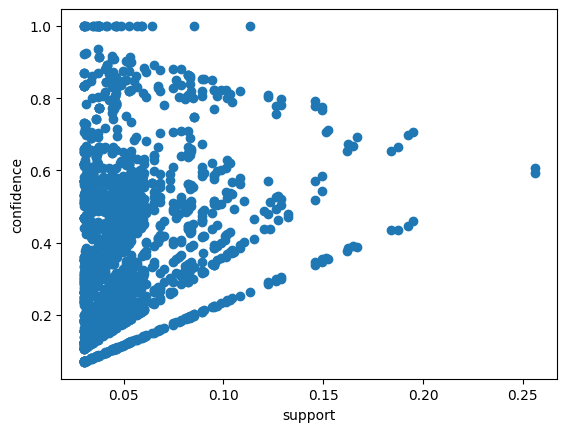

In [32]:
#visualization plot
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# **Assignment 9(b)**

# **2.My Movies DataSet(my_movies.csv)**

In [33]:
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [34]:
#importing dataset
my_movies=pd.read_csv('my_movies.csv')

In [35]:
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# **Exploratary Data Analysis**

In [36]:
my_movies.shape

(10, 15)

In [37]:
my_movies.isna()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [38]:
my_movies.any()

V1               True
V2               True
V3               True
V4               True
V5               True
Sixth Sense      True
Gladiator        True
LOTR1            True
Harry Potter1    True
Patriot          True
LOTR2            True
Harry Potter2    True
LOTR             True
Braveheart       True
Green Mile       True
dtype: bool

In [39]:
my_movies.duplicated().sum()

3

In [40]:
my_movies[my_movies.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [41]:
my_movies.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [42]:
my_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [43]:
my_movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
my_mv=my_movies.iloc[:,5:]

In [45]:
my_mv.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


**Data preprocessing is not required because the data is already in the  transaction form**

# **Apriori Algorithm**

**1.Association rule if the support is 30% and confidence is 60%**

In [46]:
freq_item=apriori(my_mv,min_support=0.3,use_colnames=True)
freq_item

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


In [47]:
r=association_rules(freq_item,metric='lift',min_threshold=0.6)
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


In [48]:
r[r['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


In [49]:
r.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


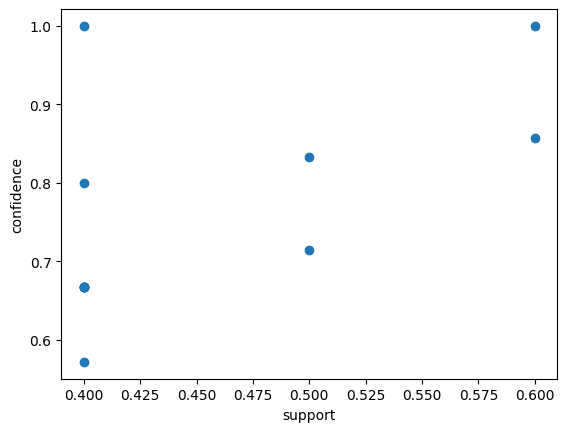

In [50]:
#visualization plot
plt.scatter(r['support'],r['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**2.Association rule if the support is 20% and confidence is 70%**

In [51]:
freq_item2=apriori(my_mv,min_support=0.2)
freq_item2

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.2,(9)
7,0.5,"(0, 1)"
8,0.4,"(0, 4)"
9,0.2,"(0, 9)"


In [52]:
r2=association_rules(freq_item2,metric='lift',min_threshold=0.7)
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(9),(0),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(2),(5),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(5),(2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [53]:
r2[r2['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(9),(0),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(2),(5),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(5),(2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [54]:
r2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(2),(5),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(5),(2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(9),(0),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(0, 4)",(1),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
14,(1),"(0, 4)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
10,"(0, 1)",(4),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
15,(4),"(0, 1)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


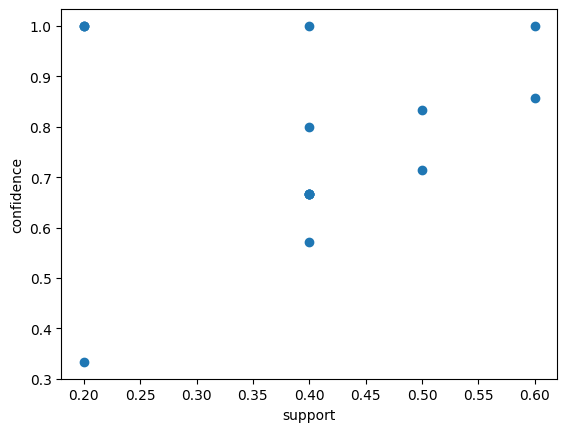

In [55]:
#visualization plot
plt.scatter(r2['support'],r2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**3.Association rules for support 10% and confidence 80%**

In [56]:
freq_item3=apriori(my_mv,min_support=0.1)
freq_item3

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [57]:
r3=association_rules(freq_item3,metric='lift',min_threshold=0.8)
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(0),(2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [58]:
r3[r3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [59]:
r3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
206,"(9, 2)","(3, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
211,"(3, 5)","(9, 2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
221,"(0, 2, 3)","(9, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
139,"(1, 9)","(0, 7)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
138,"(0, 7)","(1, 9)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
5,(3),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
62,"(2, 5)",(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000


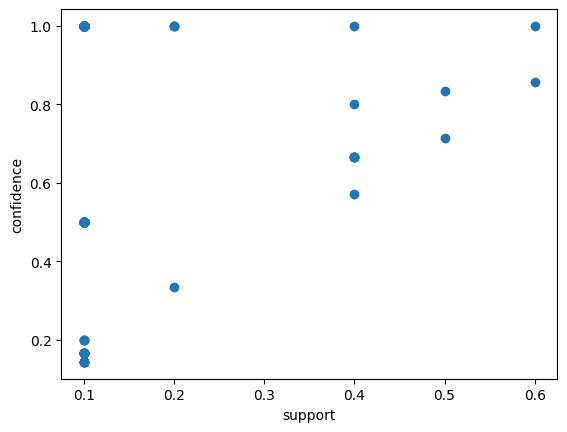

In [60]:
#visualization plot
plt.scatter(r3['support'],r3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**4.Association rules for support 5% and confidence 90%**

In [61]:
freq_item4=apriori(my_mv,min_support=0.05)
freq_item4

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [62]:
r4=association_rules(freq_item4,metric='lift',min_threshold=0.9)
r4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
234,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
235,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [63]:
r4.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
131,"(1, 9)","(0, 7)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.00
188,"(9, 5)","(0, 3)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.00
94,"(1, 9)",(7),0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.00
130,"(0, 7)","(1, 9)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.00
203,"(3, 5)","(9, 2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
35,(0),"(1, 4)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
44,"(0, 1)",(9),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0,0.00


In [64]:
r4[r4['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
234,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
235,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


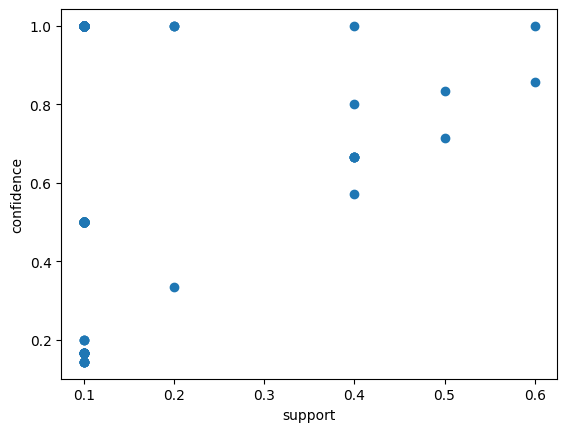

In [65]:
#visualization plot
plt.scatter(r4['support'],r4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [66]:
#completed////

# **Completed**